In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import classification_report

ImportError: cannot import name 'classification_report' from 'sklearn' (C:\Users\admin\anaconda3\lib\site-packages\sklearn\__init__.py)

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,MONTH,Con_Type_N,nature_of_inj,part_of_body,event_type,evn_factor,hum_factor,task_assigned,build_stor,part_of_body.1,Degree of Injury
0,8,0,1,10,2,2,14,1,0,10,0
1,7,8,9,10,2,18,10,1,1,10,0
2,6,0,5,12,14,18,4,2,0,12,0
3,6,3,21,13,5,13,14,1,1,13,1
4,6,0,3,20,1,6,15,1,0,20,0


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Degree of Injury', axis=1)
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['Degree of Injury','build_stor'], axis=1)
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
var=df.columns.values.tolist()

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=1, step=1)
rfe = rfe.fit(X_train, y_train)
print(rfe.ranking_)

[1 4 3 8 9 5 7 2 6]


In [30]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100
from sklearn.model_selection import train_test_split

X = df.drop(['Degree of Injury','build_stor'], axis=1)
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)
var=df.columns.values.tolist()

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=1, step=1)
rfe = rfe.fit(X_train, y_train)
print(rfe.ranking_)


Shape of X before SMOTE: (4847, 9)
Shape of X after SMOTE: (5928, 9)

Balance of positive and negative classes (%):
[2 4 3 9 6 5 7 1 8]


[[634 103]
 [162 583]]


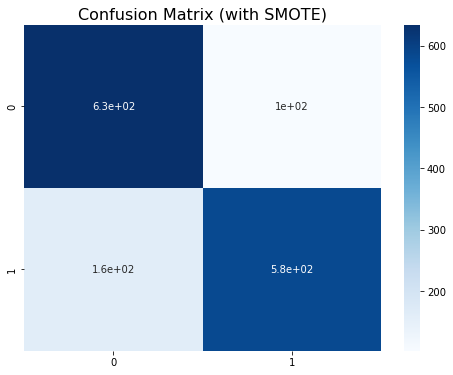

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['Degree of Injury','build_stor'], axis=1)
y = df['Degree of Injury']



logreg = LogisticRegression()
lr = logreg.fit(X_train,y_train)
preds= lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)

cm = metrics.confusion_matrix(y_test, preds)
print(cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [24]:
targets = ['Fatal','Non Fatal']
print(classification_reports(y_test,pred,target_names=targets))

NameError: name 'classification_reports' is not defined

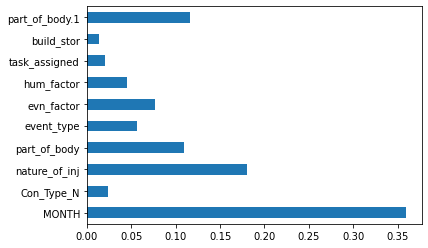

In [23]:
attr = model.feature_importances_
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['Degree of Injury','build_stor'], axis=1)
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy = 0.89
Recall = 0.88



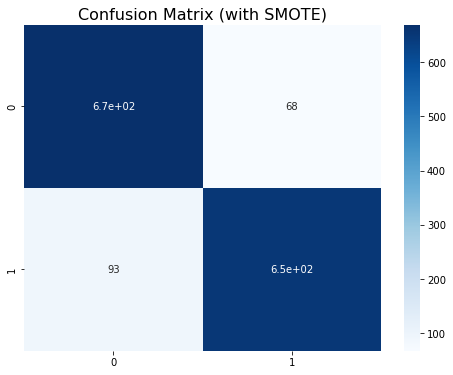

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [28]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 6, 8, 10, 11, 13,
                                                         15, 16, 18, 20]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [50]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    
    print('Model Performance')
    print('Accuracy = {:0f}'.format(accuracy_score(y_test, preds)))
    print('Recall = {:0f}'.format(recall_score(y_test, preds)))
    return 
model = RandomForestClassifier(n_estimators = 10, random_state = 42)
model.fit(X_train, y_train)
accuracy = evaluate(model, X_test, y_test)

Model Performance
Accuracy = 0.891363
Recall = 0.875168


In [51]:
model = RandomForestClassifier(n_estimators = 10,min_samples_split =10, min_samples_leaf = 2, bootstrap = True, random_state = 42)
model.fit(X_train, y_train)
accuracy = evaluate(model, X_test, y_test)

Model Performance
Accuracy = 0.891363
Recall = 0.875168
